# Pandas

Pandas extends the numpy ndarray to allow for a data structure that labels the columns (called a *data frame*).

In this manner, its main competition is R--the data frame provides the functionality for data analysis that R natively presents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Series

A series is a labeled array.  It looks superficially like a dictionary, but is fixed size, and can handle missing values.  It also can also be operated on with any `numpy` operation or the standard operators (a dictionary cannot).

Some examples from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [14]:
s = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [4]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [5]:
pd.Series(np.random.randn(5))

0   -1.456100
1    0.706797
2   -1.724434
3    0.722463
4    0.268299
dtype: float64

You can initialize from a dictionary.

In [6]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [7]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

Note that NaN indicates a missing value.

You can operate on a series as you would any ndarray.

In [8]:
s[0]

1

In [9]:
s[:3]

a    1
b    2
c    3
dtype: int64

In [10]:
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [11]:
s[s > s.median()]

d    4
e    5
dtype: int64

In [12]:
np.exp(s)

a      2.718282
b      7.389056
c     20.085537
d     54.598150
e    148.413159
dtype: float64

You can also index by label.

In [15]:
s['a']

1

In [16]:
s['e']

5

In [17]:
s['f']

KeyError: 'f'

In [20]:
s.get('f', np.nan)

nan

In [21]:
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [22]:
'e' in s

True

In [23]:
s + s

a     2
b     4
c     6
d     8
e    10
dtype: int64

In [24]:
s * 2

a     2
b     4
c     6
d     8
e    10
dtype: int64

Note that operations are always done on like labels, so the following is not exactly the same as numpy arrays.  In this sense, pandas results respect the union of indices.

In [25]:
s[1:] + s[:-1]

a    NaN
b    4.0
c    6.0
d    8.0
e    NaN
dtype: float64

A series can have a name.

In [26]:
s = pd.Series(np.random.randn(5), name='something')
s

0   -0.378333
1   -0.432072
2    0.312563
3    0.817991
4   -1.773475
Name: something, dtype: float64

## DataFrame

The dataframe is like a spreadsheet -- the columns and rows have labels.  It is 2-d.

You can initialize from Series.

In [27]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [28]:
df = pd.DataFrame(d)
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In IPython, tab completion for column names is enabled.

In [29]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [30]:
pd.DataFrame(d, index=['d', 'b', 'a'])

one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0

or from lists / ndarrays

In [31]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

In [32]:
pd.DataFrame(d)

one  two
0  1.0  4.0
1  2.0  3.0
2  3.0  2.0
3  4.0  1.0

In [33]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

one  two
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0

There are lots of other initialization methods, e.g, list of dicts.

In [34]:
data2 = [{'a': 1, 'b': "2"}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2, index=['first', 'second'])

a   b     c
first   1   2   NaN
second  5  10  20.0

Working with the dataframe.

You can index it as it it were Series objects.

In [35]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [36]:
df

one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0

In [37]:
type(df['one'])

pandas.core.series.Series

In [38]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df['SomeNums'] = [1,2,3,4]
df

one  two  three   flag  SomeNums
a  1.0  1.0    1.0  False         1
b  2.0  2.0    4.0  False         2
c  3.0  3.0    9.0   True         3
d  NaN  4.0    NaN  False         4

You can delete or pop columns.

In [39]:
del df['two']

In [40]:
three = df.pop('three')

In [41]:
df

one   flag  SomeNums
a  1.0  False         1
b  2.0  False         2
c  3.0   True         3
d  NaN  False         4

In [42]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

initialize with a scalar

In [45]:
df['foo'] = 0

In [46]:
df

one   flag  SomeNums  foo
a  1.0  False         1    0
b  2.0  False         2    0
c  3.0   True         3    0
d  NaN  False         4    0

A loop will iterate over the column names

In [47]:
for column in df:
    print(column)

one
flag
SomeNums
foo


To iterate over a row we must first access it

In [48]:
for val in df.loc["a"]:
    print(val)

1.0
False
1
0


## CSV

You can also read from CSV.

Note, if there is stray whitespace in your strings in the CSV, pandas will keep it.  This is a bit annoying, and you might need to investigate converters to get things properly formatted.

There are similar methods for HDF5 and excel.

In [49]:
grades = pd.read_csv('sample.csv', index_col="student", skipinitialspace=True)

In [50]:
grades

hw 1  hw 2  hw 3  hw 4  exam
student                              
A        10.0   9.0    10     7    97
B         8.0   7.0     9     9    82
C         NaN   9.0     6     5    75
D         8.0   9.0     9     9    90
E         NaN  10.0    10    10    95
F         8.0   2.0     6     7    66
G         6.0   NaN     4     5    60
H         8.0   8.0     9     8    84
I        10.0   7.0    10    10    92
J        10.0   6.0     9     9    91
K         8.0   7.0     6     8    87
L         3.0   8.0     5     7    71
M         9.0   9.0     8     9    94
N         8.0  10.0     9     9    90
O        10.0  10.0    10     9    99
P         8.0   9.0     8    10    94
Q         5.0   7.0     6     5    78

In [51]:
grades.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q'],
      dtype='object', name='student')

In [52]:
grades.columns

Index(['hw 1', 'hw 2', 'hw 3', 'hw 4', 'exam'], dtype='object')

In [53]:
grades.loc["A"]

hw 1    10.0
hw 2     9.0
hw 3    10.0
hw 4     7.0
exam    97.0
Name: A, dtype: float64

In [54]:
grades.iloc[0]

hw 1    10.0
hw 2     9.0
hw 3    10.0
hw 4     7.0
exam    97.0
Name: A, dtype: float64

In [55]:
grades['hw 1']

student
A    10.0
B     8.0
C     NaN
D     8.0
E     NaN
F     8.0
G     6.0
H     8.0
I    10.0
J    10.0
K     8.0
L     3.0
M     9.0
N     8.0
O    10.0
P     8.0
Q     5.0
Name: hw 1, dtype: float64

In [56]:
grades['hw average'] = (grades['hw 1'] + grades['hw 2'] + grades['hw 3'] + grades['hw 4'])/4.0

In [57]:
grades

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
A        10.0   9.0    10     7    97        9.00
B         8.0   7.0     9     9    82        8.25
C         NaN   9.0     6     5    75         NaN
D         8.0   9.0     9     9    90        8.75
E         NaN  10.0    10    10    95         NaN
F         8.0   2.0     6     7    66        5.75
G         6.0   NaN     4     5    60         NaN
H         8.0   8.0     9     8    84        8.25
I        10.0   7.0    10    10    92        9.25
J        10.0   6.0     9     9    91        8.50
K         8.0   7.0     6     8    87        7.25
L         3.0   8.0     5     7    71        5.75
M         9.0   9.0     8     9    94        8.75
N         8.0  10.0     9     9    90        9.00
O        10.0  10.0    10     9    99        9.75
P         8.0   9.0     8    10    94        8.75
Q         5.0   7.0     6     5    78        5.75

This didn't handle the missing data properly.

In [58]:
g2 = grades.fillna(0)

In [59]:
g2['hw average'] = (g2['hw 1'] + g2['hw 2'] + g2['hw 3'] + g2['hw 4'])/4.0

In [60]:
g2

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
A        10.0   9.0    10     7    97        9.00
B         8.0   7.0     9     9    82        8.25
C         0.0   9.0     6     5    75        5.00
D         8.0   9.0     9     9    90        8.75
E         0.0  10.0    10    10    95        7.50
F         8.0   2.0     6     7    66        5.75
G         6.0   0.0     4     5    60        3.75
H         8.0   8.0     9     8    84        8.25
I        10.0   7.0    10    10    92        9.25
J        10.0   6.0     9     9    91        8.50
K         8.0   7.0     6     8    87        7.25
L         3.0   8.0     5     7    71        5.75
M         9.0   9.0     8     9    94        8.75
N         8.0  10.0     9     9    90        9.00
O        10.0  10.0    10     9    99        9.75
P         8.0   9.0     8    10    94        8.75
Q         5.0   7.0     6     5    78        5.75

For big dataframes, we can view just pieces.

In [61]:
g2.head()

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
A        10.0   9.0    10     7    97        9.00
B         8.0   7.0     9     9    82        8.25
C         0.0   9.0     6     5    75        5.00
D         8.0   9.0     9     9    90        8.75
E         0.0  10.0    10    10    95        7.50

In [62]:
g2.tail(2)

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
P         8.0   9.0     8    10    94        8.75
Q         5.0   7.0     6     5    78        5.75

### Statistics

We get lots of statistics.

In [63]:
g2.describe()

hw 1       hw 2       hw 3       hw 4       exam  hw average
count  17.000000  17.000000  17.000000  17.000000  17.000000   17.000000
mean    7.000000   7.470588   7.882353   8.000000  85.000000    7.588235
std     3.221025   2.741296   1.964763   1.732051  11.407235    1.747635
min     0.000000   0.000000   4.000000   5.000000  60.000000    3.750000
25%     6.000000   7.000000   6.000000   7.000000  78.000000    5.750000
50%     8.000000   8.000000   9.000000   9.000000  90.000000    8.250000
75%     9.000000   9.000000   9.000000   9.000000  94.000000    8.750000
max    10.000000  10.000000  10.000000  10.000000  99.000000    9.750000

Want to sort by values?

In [64]:
g2.sort_values(by="exam", ascending = False)

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
O        10.0  10.0    10     9    99        9.75
A        10.0   9.0    10     7    97        9.00
E         0.0  10.0    10    10    95        7.50
M         9.0   9.0     8     9    94        8.75
P         8.0   9.0     8    10    94        8.75
I        10.0   7.0    10    10    92        9.25
J        10.0   6.0     9     9    91        8.50
N         8.0  10.0     9     9    90        9.00
D         8.0   9.0     9     9    90        8.75
K         8.0   7.0     6     8    87        7.25
H         8.0   8.0     9     8    84        8.25
B         8.0   7.0     9     9    82        8.25
Q         5.0   7.0     6     5    78        5.75
C         0.0   9.0     6     5    75        5.00
L         3.0   8.0     5     7    71        5.75
F         8.0   2.0     6     7    66        5.75
G         6.0   0.0     4     5    60        3.75

In [65]:
g2.mean()

hw 1           7.000000
hw 2           7.470588
hw 3           7.882353
hw 4           8.000000
exam          85.000000
hw average     7.588235
dtype: float64

In [66]:
g2.median()

hw 1           8.00
hw 2           8.00
hw 3           9.00
hw 4           9.00
exam          90.00
hw average     8.25
dtype: float64

In [67]:
g2.max()

hw 1          10.00
hw 2          10.00
hw 3          10.00
hw 4          10.00
exam          99.00
hw average     9.75
dtype: float64

In [68]:
g2

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
A        10.0   9.0    10     7    97        9.00
B         8.0   7.0     9     9    82        8.25
C         0.0   9.0     6     5    75        5.00
D         8.0   9.0     9     9    90        8.75
E         0.0  10.0    10    10    95        7.50
F         8.0   2.0     6     7    66        5.75
G         6.0   0.0     4     5    60        3.75
H         8.0   8.0     9     8    84        8.25
I        10.0   7.0    10    10    92        9.25
J        10.0   6.0     9     9    91        8.50
K         8.0   7.0     6     8    87        7.25
L         3.0   8.0     5     7    71        5.75
M         9.0   9.0     8     9    94        8.75
N         8.0  10.0     9     9    90        9.00
O        10.0  10.0    10     9    99        9.75
P         8.0   9.0     8    10    94        8.75
Q         5.0   7.0     6     5    78        5.75

In [69]:
g2.apply(lambda x: x.max() - x.min())

hw 1          10.0
hw 2          10.0
hw 3           6.0
hw 4           5.0
exam          39.0
hw average     6.0
dtype: float64

### Access

Pandas provides optimizes methods for accessing data: .at, .iat, .loc, and .iloc.

The standard slice notation works for rows, but note *when using labels, both endpoints are included*.

In [70]:
g2

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
A        10.0   9.0    10     7    97        9.00
B         8.0   7.0     9     9    82        8.25
C         0.0   9.0     6     5    75        5.00
D         8.0   9.0     9     9    90        8.75
E         0.0  10.0    10    10    95        7.50
F         8.0   2.0     6     7    66        5.75
G         6.0   0.0     4     5    60        3.75
H         8.0   8.0     9     8    84        8.25
I        10.0   7.0    10    10    92        9.25
J        10.0   6.0     9     9    91        8.50
K         8.0   7.0     6     8    87        7.25
L         3.0   8.0     5     7    71        5.75
M         9.0   9.0     8     9    94        8.75
N         8.0  10.0     9     9    90        9.00
O        10.0  10.0    10     9    99        9.75
P         8.0   9.0     8    10    94        8.75
Q         5.0   7.0     6     5    78        5.75

In [71]:
g2["E":"I"]

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
E         0.0  10.0    10    10    95        7.50
F         8.0   2.0     6     7    66        5.75
G         6.0   0.0     4     5    60        3.75
H         8.0   8.0     9     8    84        8.25
I        10.0   7.0    10    10    92        9.25

In [72]:
g2.loc[:,["hw 1", "exam"]]

hw 1  exam
student            
A        10.0    97
B         8.0    82
C         0.0    75
D         8.0    90
E         0.0    95
F         8.0    66
G         6.0    60
H         8.0    84
I        10.0    92
J        10.0    91
K         8.0    87
L         3.0    71
M         9.0    94
N         8.0    90
O        10.0    99
P         8.0    94
Q         5.0    78

`at` is a faster access method.

In [73]:
g2.at["A","exam"]

97

The `i` routines work in index space, similar to how numpy does.

In [74]:
g2.iloc[3:5,0:2]

hw 1  hw 2
student            
D         8.0   9.0
E         0.0  10.0

In [75]:
g2.iloc[[1,3,5], [1,2,3,4]]

hw 2  hw 3  hw 4  exam
student                        
B         7.0     9     9    82
D         9.0     9     9    90
F         2.0     6     7    66

In [76]:
g2.iat[2,2]

6

### Boolean Indexing

In [77]:
g2[g2.exam > 90]

hw 1  hw 2  hw 3  hw 4  exam  hw average
student                                          
A        10.0   9.0    10     7    97        9.00
E         0.0  10.0    10    10    95        7.50
I        10.0   7.0    10    10    92        9.25
J        10.0   6.0     9     9    91        8.50
M         9.0   9.0     8     9    94        8.75
O        10.0  10.0    10     9    99        9.75
P         8.0   9.0     8    10    94        8.75

### np arrays

In [78]:
g2.loc[:, "new"] = np.random.random(len(g2))

In [79]:
g2

hw 1  hw 2  hw 3  hw 4  exam  hw average       new
student                                                    
A        10.0   9.0    10     7    97        9.00  0.727325
B         8.0   7.0     9     9    82        8.25  0.669978
C         0.0   9.0     6     5    75        5.00  0.245449
D         8.0   9.0     9     9    90        8.75  0.500625
E         0.0  10.0    10    10    95        7.50  0.485234
F         8.0   2.0     6     7    66        5.75  0.559537
G         6.0   0.0     4     5    60        3.75  0.017455
H         8.0   8.0     9     8    84        8.25  0.250275
I        10.0   7.0    10    10    92        9.25  0.517291
J        10.0   6.0     9     9    91        8.50  0.895139
K         8.0   7.0     6     8    87        7.25  0.341352
L         3.0   8.0     5     7    71        5.75  0.882941
M         9.0   9.0     8     9    94        8.75  0.339271
N         8.0  10.0     9     9    90        9.00  0.765794
O        10.0  10.0    10     9    99        9.75  0.407519
P         8.0   9.0     8    10    94        8.75  0.590498
Q         5.0   7.0     6     5    78        5.75  0.433992

Resetting Values

In [81]:
a = g2[g2.exam < 80].index
print(a)

Index(['C', 'F', 'G', 'L', 'Q'], dtype='object', name='student')


In [82]:
g2.loc[a, "exam"] = 80

In [83]:
g2

hw 1  hw 2  hw 3  hw 4  exam  hw average       new
student                                                    
A        10.0   9.0    10     7    97        9.00  0.727325
B         8.0   7.0     9     9    82        8.25  0.669978
C         0.0   9.0     6     5    80        5.00  0.245449
D         8.0   9.0     9     9    90        8.75  0.500625
E         0.0  10.0    10    10    95        7.50  0.485234
F         8.0   2.0     6     7    80        5.75  0.559537
G         6.0   0.0     4     5    80        3.75  0.017455
H         8.0   8.0     9     8    84        8.25  0.250275
I        10.0   7.0    10    10    92        9.25  0.517291
J        10.0   6.0     9     9    91        8.50  0.895139
K         8.0   7.0     6     8    87        7.25  0.341352
L         3.0   8.0     5     7    80        5.75  0.882941
M         9.0   9.0     8     9    94        8.75  0.339271
N         8.0  10.0     9     9    90        9.00  0.765794
O        10.0  10.0    10     9    99        9.75  0.407519
P         8.0   9.0     8    10    94        8.75  0.590498
Q         5.0   7.0     6     5    80        5.75  0.433992

## Histogramming

In [84]:
%matplotlib inline

In [85]:
g2.hist(column="exam", bins=7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feb77303790>]],
      dtype=object)

Similarly we may create bar graphs

In [86]:
a = g2["exam"].value_counts()
print(a)

80    5
94    2
90    2
95    1
92    1
91    1
87    1
84    1
82    1
99    1
97    1
Name: exam, dtype: int64


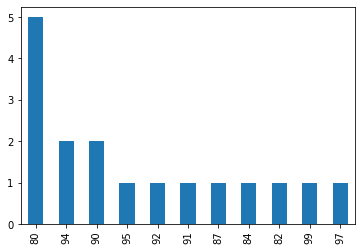

In [87]:
a.plot.bar()

## Plotting

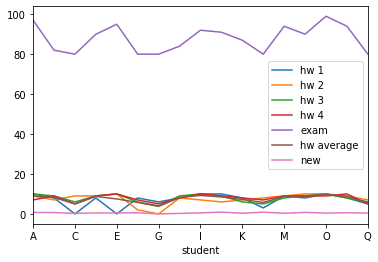

In [88]:
g2.plot()

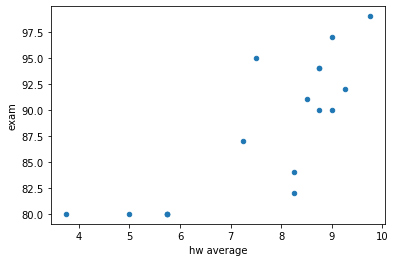

In [89]:
g2.plot.scatter(x="hw average", y="exam", marker="o")

## Regression

In [90]:
g2["hw average"]

student
A    9.00
B    8.25
C    5.00
D    8.75
E    7.50
F    5.75
G    3.75
H    8.25
I    9.25
J    8.50
K    7.25
L    5.75
M    8.75
N    9.00
O    9.75
P    8.75
Q    5.75
Name: hw average, dtype: float64

In [91]:
g2["exam"]

student
A    97
B    82
C    80
D    90
E    95
F    80
G    80
H    84
I    92
J    91
K    87
L    80
M    94
N    90
O    99
P    94
Q    80
Name: exam, dtype: int64

We use the scikit-learn (sklearn) library, often used for machine learning and statistical modeling, to carry out the regression.

Note that sklearn's LinearRegression function requires our data to be of a particular shape.

In [92]:
from sklearn.linear_model import LinearRegression

x = np.asarray(g2["hw average"]).reshape(-1,1)
y = np.asarray(g2["exam"]).reshape(-1,1)
reg = LinearRegression().fit(x,y)
print(x)

[[9.  ]
 [8.25]
 [5.  ]
 [8.75]
 [7.5 ]
 [5.75]
 [3.75]
 [8.25]
 [9.25]
 [8.5 ]
 [7.25]
 [5.75]
 [8.75]
 [9.  ]
 [9.75]
 [8.75]
 [5.75]]


In [93]:
student_hw_avg = 9.5
prediction = reg.predict(np.array([student_hw_avg]).reshape(1,-1))
slope = reg.coef_
offset = reg.intercept_

In [94]:
print("R^2: {:.3f}".format(reg.score(x,y)))
print("Regression slope: {:.3f}".format(slope[0][0]))
print("Regression intercept: {:.3f}".format(offset[0]))
print("We predict a student with a homework average of {} will score {:.2f} on the exam".format(student_hw_avg, prediction[0][0]))

R^2: 0.662
Regression slope: 3.143
Regression intercept: 64.092
We predict a student with a homework average of 9.5 will score 93.95 on the exam


Text(0, 0.5, 'Exam Score')

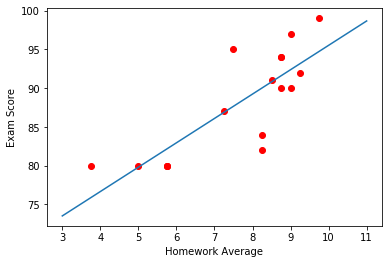

In [95]:
x_vals = [3,11]
y_vals = []
for x in x_vals:
    y_vals.append(slope[0][0] * x + offset[0])

plt.scatter(g2["hw average"], g2["exam"], color = "red")
plt.plot(x_vals, y_vals)
plt.xlabel("Homework Average")
plt.ylabel("Exam Score")


A lot more examples at: http://pandas.pydata.org/pandas-docs/stable/visualization.html